<p style = "font-size : 38px; color : #393e46 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #00adb5; border-radius: 5px 5px;"><strong>EDA for Adirani DS Hackathon</strong></p>

In [1]:
# Team Name: MEAT
# Author: Ran Cheng
# Date: Feb-18, 2023

In [2]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from collections import Counter
import seaborn as sns

def get_files_in_folder_recursive(folder_path):
    file_list = []
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            file_list.append(os.path.join(root, file))
    return file_list

def get_df_from_xls(file, idx):
    xls = pd.ExcelFile(file)
#     print ('there are {} sheets in the excel file of {}'.format(len(xls.sheet_names), file))
    return pd.read_excel(xls, 'Sheet{}'.format(idx))

def get_sheet_num(file):
    return len(pd.ExcelFile(file).sheet_names)


<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; "><strong> Get the basic information from each excel sheet</strong></p> 

In [3]:
# folder_path = 'fwddataset'
# files = get_files_in_folder_recursive(folder_path)
# files

folder_path = 'dataset'
files = get_files_in_folder_recursive(folder_path)
files

['dataset/demographics-details_0.xlsx',
 'dataset/.DS_Store',
 'dataset/advertising-overview_0.xlsx',
 'dataset/engagement-overview_0.xlsx',
 'dataset/engagement-events_0.xlsx',
 'dataset/monetisation-overview_0.xlsx',
 'dataset/e-commerce-purchases_0.xlsx',
 'dataset/engagement-page-and-screens_0.xlsx',
 'dataset/demographics-overview_0.xlsx',
 'dataset/engagement-conversions_0.xlsx']

In [4]:
# for file in files:
#     try:
#         if 'xlsx' in file:
#             for i in range(get_sheet_num(file)):
#                 print(file, 'sheet id: {}'.format(i+1), get_df_from_xls(file, i+1).columns)
#     except:
#         pass

<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; "><strong> Analyse the dataset relating to conversions</strong></p>

<p style = "font-size : 20px; color : #34656d ; font-family : 'Comic Sans MS'; "><strong>Looking at demographics details</strong></p> 

In [5]:
file = 'dataset/demographics-details_0.xlsx'
sheet_id = 3
demo_3_df = get_df_from_xls(file, sheet_id)
demo_3_df.head(10)

,Country,Users,New users,Engaged sessions,Engagement rate,Engaged sessions per user,Average engagement time,Event count,Conversions,Total revenue
0,United States,96534,94702,83311,0.627592,0.863022,88.594019,961306,29859,709373.55
1,Canada,2089,2058,1638,0.594987,0.784107,89.224988,19278,582,13345.36
2,United Kingdom,1074,1053,955,0.638796,0.889199,97.042831,11156,274,4344.85
3,(not set),998,998,4,0.003992,0.004008,0.174349,3012,2,0.00
4,Germany,840,701,587,0.560115,0.698810,73.792857,6933,150,2097.40
5,France,386,377,345,0.640074,0.893782,109.569948,4854,130,5933.80
6,India,303,298,199,0.616099,0.656766,20.613861,1528,7,0.00
7,Netherlands,204,198,177,0.678161,0.867647,76.333333,1843,38,1139.00
8,Spain,188,186,140,0.576132,0.744681,88.813830,1599,59,1755.00
9,Brazil,161,162,120,0.558140,0.745342,72.639752,1310,39,567.00


In [6]:
# verify the conversion number
demo_3_df['Conversions'].sum()

31529

In [7]:
for col2 in demo_3_df.columns.values:
    try:
        col1 = "Conversions"
        corr = demo_3_df["Conversions"].corr(demo_3_df[col2])
        print ("Correlation between ", col1, " and ", col2, "is: ", round(corr, 2))
    except:
        pass

Correlation between  Conversions  and  Users is:  1.0
Correlation between  Conversions  and  New users is:  1.0
Correlation between  Conversions  and  Engaged sessions is:  1.0
Correlation between  Conversions  and  Engagement rate is:  0.04
Correlation between  Conversions  and  Engaged sessions per user is:  0.04
Correlation between  Conversions  and  Average engagement time is:  0.06
Correlation between  Conversions  and  Event count is:  1.0
Correlation between  Conversions  and  Conversions is:  1.0
Correlation between  Conversions  and  Total revenue is:  1.0


In [8]:
demo_3_df['convert_rate'] = demo_3_df['Conversions']/demo_3_df['Users']
demo_3_df.head(10)

,Country,Users,New users,Engaged sessions,Engagement rate,Engaged sessions per user,Average engagement time,Event count,Conversions,Total revenue,convert_rate
0,United States,96534,94702,83311,0.627592,0.863022,88.594019,961306,29859,709373.55,0.309311
1,Canada,2089,2058,1638,0.594987,0.784107,89.224988,19278,582,13345.36,0.278602
2,United Kingdom,1074,1053,955,0.638796,0.889199,97.042831,11156,274,4344.85,0.255121
3,(not set),998,998,4,0.003992,0.004008,0.174349,3012,2,0.00,0.002004
4,Germany,840,701,587,0.560115,0.698810,73.792857,6933,150,2097.40,0.178571
5,France,386,377,345,0.640074,0.893782,109.569948,4854,130,5933.80,0.336788
6,India,303,298,199,0.616099,0.656766,20.613861,1528,7,0.00,0.023102
7,Netherlands,204,198,177,0.678161,0.867647,76.333333,1843,38,1139.00,0.186275
8,Spain,188,186,140,0.576132,0.744681,88.813830,1599,59,1755.00,0.313830
9,Brazil,161,162,120,0.558140,0.745342,72.639752,1310,39,567.00,0.242236


<p style = "font-size : 20px; color : #810000 ; font-family : 'Comic Sans MS'; "><strong>Users from Asain countries seems less interested in the our product. There is not much direct information from demographic details. </strong></p>

<p style = "font-size : 20px; color : #34656d ; font-family : 'Comic Sans MS'; "><strong>Looking at advertising details</strong></p> 

In [9]:
file = 'dataset/advertising-overview_0.xlsx'
sheet_id = 1
ad_1_df = get_df_from_xls(file, sheet_id)
ad_1_df

,Default channel group,Conversions
0,Organic Search,15238.715750
1,Paid Search,7970.363212
2,Direct,2999.000000
3,Organic Social,1505.144646
4,Referral,1461.769686
5,Email,1044.508931
6,Paid Social,920.349988
7,Unassigned,242.530930
8,Display,167.555387
9,Cross-network,115.839248


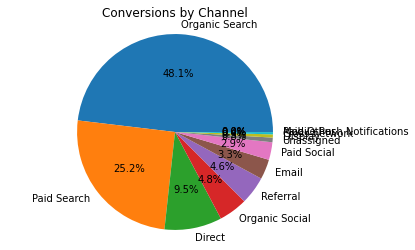

In [10]:
plt.pie(ad_1_df['Conversions'], labels=ad_1_df['Default channel group'], autopct='%1.1f%%')
plt.axis('equal')
plt.title('Conversions by Channel')
plt.show()

In [11]:
file = 'dataset/advertising-overview_0.xlsx'
sheet_id = 2
ad_2_df = get_df_from_xls(file, sheet_id)
ad_2_df

,Default channel group,Conversions,Last click path attributed conversions
0,"[""Organic Search"",""Organic Search""]",7854,NaN
1,"[""Paid Search""]",5881,NaN
2,"[""Direct""]",2999,NaN
3,"[""Organic Search"",""Organic Search"",""Organic Se...",1836,NaN
4,"[""Organic Search"",""Organic Search"",""Organic Se...",1179,NaN
...,...,...,...
1262,"[""Unassigned"",""Unassigned"",""Unassigned"",""Unass...",1,NaN
1263,"[""Unassigned"",""Unassigned"",""Unassigned"",""Unass...",1,NaN
1264,"[""Unassigned"",""Unassigned"",""Unassigned"",""Unass...",1,NaN
1265,"[""Unassigned"",""Unassigned"",""Unassigned"",""Unass...",1,NaN


In [12]:
# verify the conversions number
ad_2_df['Conversions'].sum()

31672

In [13]:
def get_action_len(row_action_list):
    return len(eval(row_action_list))

In [14]:
ad_2_df['action_length'] = ad_2_df.apply(lambda row : get_action_len(row['Default channel group']), axis = 1)
ad_2_df

,Default channel group,Conversions,Last click path attributed conversions,action_length
0,"[""Organic Search"",""Organic Search""]",7854,NaN,2
1,"[""Paid Search""]",5881,NaN,1
2,"[""Direct""]",2999,NaN,1
3,"[""Organic Search"",""Organic Search"",""Organic Se...",1836,NaN,3
4,"[""Organic Search"",""Organic Search"",""Organic Se...",1179,NaN,4
...,...,...,...,...
1262,"[""Unassigned"",""Unassigned"",""Unassigned"",""Unass...",1,NaN,18
1263,"[""Unassigned"",""Unassigned"",""Unassigned"",""Unass...",1,NaN,21
1264,"[""Unassigned"",""Unassigned"",""Unassigned"",""Unass...",1,NaN,22
1265,"[""Unassigned"",""Unassigned"",""Unassigned"",""Unass...",1,NaN,33


In [15]:
df = ad_2_df.drop(ad_2_df[ad_2_df['Conversions'] < 100].index)
df.head(10)

,Default channel group,Conversions,Last click path attributed conversions,action_length
0,"[""Organic Search"",""Organic Search""]",7854,NaN,2
1,"[""Paid Search""]",5881,NaN,1
2,"[""Direct""]",2999,NaN,1
3,"[""Organic Search"",""Organic Search"",""Organic Se...",1836,NaN,3
4,"[""Organic Search"",""Organic Search"",""Organic Se...",1179,NaN,4
5,"[""Paid Search"",""Paid Search""]",1077,NaN,2
6,"[""Organic Search""]",906,NaN,1
7,"[""Organic Search"",""Organic Search"",""Organic Se...",748,NaN,5
8,"[""Organic Social"",""Organic Social""]",589,NaN,2
9,"[""Email""]",551,NaN,1


In [16]:
col1 = "Conversions"
col2 = "action_length"
corr = df["Conversions"].corr(df['action_length'])
print ("Correlation between ", col1, " and ", col2, "is: ", round(corr, 2))

Correlation between  Conversions  and  action_length is:  -0.15


In [17]:
# analyze the most important behaviors in the default channel group
all_ps = []
for pattern in df['Default channel group']:
    for p in eval(pattern):
        all_ps.append(p)
all_ps = set(all_ps)
all_ps

{'Direct',
 'Display',
 'Email',
 'Organic Search',
 'Organic Social',
 'Paid Search',
 'Paid Social',
 'Referral'}

In [18]:

def count_behaviour(pname, row_pattern):
    my_count = Counter(eval(row_pattern))
#     print(my_count)
    return my_count[pname]

In [19]:
for p in all_ps:
    df[p] = df.apply(lambda row : count_behaviour(p, row['Default channel group']), axis = 1)

In [20]:
# average action counts
def avg_action_num(action_num, action_length):
    return action_num/action_length

for p in all_ps:
    key_p = p + '_avg'
    df[key_p] = df.apply(lambda row : avg_action_num(row[p], row['action_length']), axis = 1)
df

,Default channel group,Conversions,Last click path attributed conversions,action_length,Direct,Display,Organic Social,Email,Paid Social,Referral,Organic Search,Paid Search,Direct_avg,Display_avg,Organic Social_avg,Email_avg,Paid Social_avg,Referral_avg,Organic Search_avg,Paid Search_avg
0,"[""Organic Search"",""Organic Search""]",7854,NaN,2,0,0,0,0,0,0,2,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,"[""Paid Search""]",5881,NaN,1,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,"[""Direct""]",2999,NaN,1,1,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"[""Organic Search"",""Organic Search"",""Organic Se...",1836,NaN,3,0,0,0,0,0,0,3,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,"[""Organic Search"",""Organic Search"",""Organic Se...",1179,NaN,4,0,0,0,0,0,0,4,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,"[""Paid Search"",""Paid Search""]",1077,NaN,2,0,0,0,0,0,0,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,"[""Organic Search""]",906,NaN,1,0,0,0,0,0,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,"[""Organic Search"",""Organic Search"",""Organic Se...",748,NaN,5,0,0,0,0,0,0,5,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,"[""Organic Social"",""Organic Social""]",589,NaN,2,0,0,2,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9,"[""Email""]",551,NaN,1,0,0,0,1,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [21]:
for p in all_ps:
    key_p = p + '_avg'
    col1, col2 = "Conversions", key_p
    corr = df["Conversions"].corr(df[key_p])
    print ("Correlation between ", col1, " and ", col2, "is: ", round(corr, 2))

Correlation between  Conversions  and  Direct_avg is:  0.21
Correlation between  Conversions  and  Display_avg is:  -0.1
Correlation between  Conversions  and  Organic Social_avg is:  -0.14
Correlation between  Conversions  and  Email_avg is:  -0.11
Correlation between  Conversions  and  Paid Social_avg is:  -0.16
Correlation between  Conversions  and  Referral_avg is:  -0.16
Correlation between  Conversions  and  Organic Search_avg is:  0.14
Correlation between  Conversions  and  Paid Search_avg is:  0.27


<AxesSubplot:>

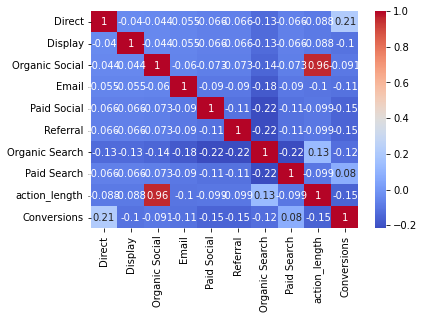

In [22]:
cols = []
for p in all_ps:
    key_p = p
    cols.append(key_p)
    
cols.append('action_length')
cols.append('Conversions')

# compute correlation matrix
corr = df[cols].corr()

# create heatmap
sns.heatmap(corr, cmap='coolwarm', annot=True)

<AxesSubplot:>

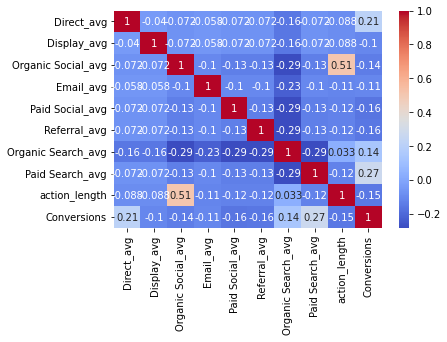

In [23]:
cols = []
for p in all_ps:
    key_p = p + '_avg'
    cols.append(key_p)
    
cols.append('action_length')
cols.append('Conversions')

# compute correlation matrix
corr = df[cols].corr()

# create heatmap
sns.heatmap(corr, cmap='coolwarm', annot=True)

<p style = "font-size : 20px; color : #810000 ; font-family : 'Comic Sans MS'; "><strong> Conversion could be strongly connected to the customer behaviours is relating to 'Direct', 'Organic Search', 'Paid Search' and the above behaviours. </strong></p>

<p style = "font-size : 20px; color : #34656d ; font-family : 'Comic Sans MS'; "><strong>Looking at engagement-conversions </strong></p> 

In [24]:
file = 'dataset/engagement-conversions_0.xlsx'
sheet_id = 1
engament_df_1 = get_df_from_xls(file, sheet_id)
engament_df_1

,Nth day,booking_engine_entrances,food_beverage_kpi,purchase,meetings_rfp
0,0,0,0,0,0
1,1,0,0,0,0
2,2,0,0,0,0
3,3,0,0,0,0
4,4,0,0,0,0
...,...,...,...,...,...
361,361,126,2,5,1
362,362,177,2,12,0
363,363,169,3,8,0
364,364,172,4,7,0


<AxesSubplot:>

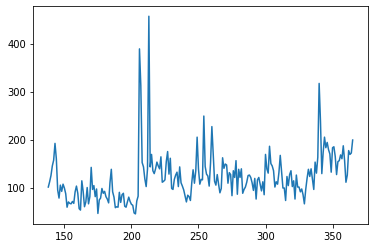

In [25]:
df = engament_df_1 [engament_df_1 ['booking_engine_entrances']>10]
df['booking_engine_entrances'].plot()

In [26]:

def get_date_and_day(nth_day):
    # start date is 2022-01-29
    date = datetime.date(2022, 1, 29) + datetime.timedelta(days=nth_day-1)
    return date, date.strftime('%A'), date.strftime('%B'), 

In [27]:
df[['date', 'day', 'month']] = df['Nth day'].apply(get_date_and_day).apply(pd.Series)
df

/Users/rc/opt/anaconda3/envs/ind/lib/python3.7/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Nth day,booking_engine_entrances,food_beverage_kpi,purchase,meetings_rfp,date,day,month
138,138,101,39,4,1,2022-06-15,Wednesday,June
139,139,112,52,4,0,2022-06-16,Thursday,June
140,140,125,71,3,0,2022-06-17,Friday,June
141,141,145,78,3,0,2022-06-18,Saturday,June
142,142,157,57,4,0,2022-06-19,Sunday,June
...,...,...,...,...,...,...,...,...
361,361,126,2,5,1,2023-01-24,Tuesday,January
362,362,177,2,12,0,2023-01-25,Wednesday,January
363,363,169,3,8,0,2023-01-26,Thursday,January
364,364,172,4,7,0,2023-01-27,Friday,January


Text(0, 0.5, 'booking_engine_entrances')

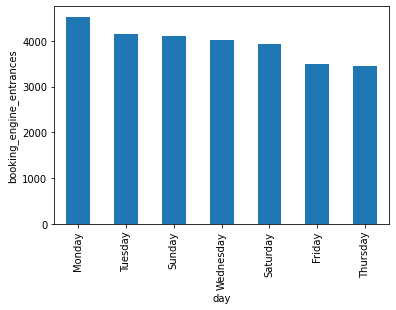

In [28]:
grouped = df.groupby('day')['booking_engine_entrances'].sum()

sorted_series = grouped.sort_values(ascending=False)

# plot the sum of each group
sorted_series.plot(kind='bar')

# add x and y labels
plt.xlabel('day')
plt.ylabel('booking_engine_entrances')

Text(0, 0.5, 'booking_engine_entrances')

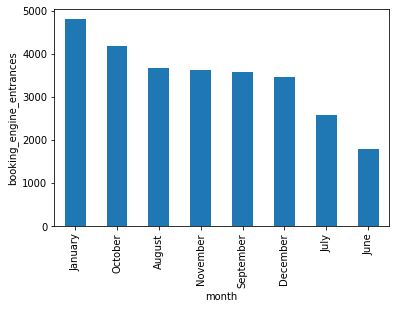

In [29]:
grouped = df.groupby('month')['booking_engine_entrances'].sum()

sorted_series = grouped.sort_values(ascending=False)

# plot the sum of each group
sorted_series.plot(kind='bar')

# add x and y labels
plt.xlabel('month')
plt.ylabel('booking_engine_entrances')

<p style = "font-size : 20px; color : #810000 ; font-family : 'Comic Sans MS'; "><strong> Regarding the timing of product searches, it appears that January and October are the months during which people are most likely to utilize booking engines, though it's worth noting that half-year data is unavailable. As for the specific day of the week, search engine entrances for bookings are highest on Mondays, though this increase is not particularly significant. </strong></p>

<p style = "font-size : 20px; color : #34656d ; font-family : 'Comic Sans MS'; "><strong>Looking at engagement-page-and-screens</strong></p> 

In [30]:
file = 'dataset/engagement-page-and-screens_0.xlsx'
sheet_id = 3
engament_p_df_3 = get_df_from_xls(file, sheet_id)
engament_p_df_3

,Page title and screen class,Views,Users,Views per user,Average engagement time,Event count,Conversions,Total revenue
0,Faro Blanco Resort Yacht Club - Reservations -...,139210,39042,3.565647,75.728651,234695,0,0.00
1,Hotels In Marathon FL | Faro Blanco Resort & M...,56194,35430,1.586057,27.381964,183811,7376,0.00
2,Faro Blanco Resort | Resorts in Marathon FL | ...,50155,30851,1.625717,27.721921,164178,5210,0.00
3,(not set),29007,20085,1.444212,0.160568,44178,0,0.00
4,Faro Blanco Resort Yacht Club - Reservations -...,21907,9278,2.361177,108.897607,36168,1185,639745.11
...,...,...,...,...,...,...,...,...
58,Groups | Faro Blanco Resort & Yacht Club,104,87,1.195402,28.344828,244,3,0.00
59,Marathon FL Family Resorts | Privacy Policy | ...,81,53,1.528302,22.528302,186,3,0.00
60,Marathon Wedding Venues | Faro Blanco Resort &...,64,46,1.391304,63.782609,189,0,0.00
61,Faro Blanco Resort Yacht Club - Reservations -...,55,50,1.100000,48.940000,69,0,0.00


In [31]:
level_1 = []
level_2 = []
level_3 = []
for page in engament_p_df_3['Page title and screen class']:
    for l in [level_1, level_2, level_3]:
        try:
            l.append(page.split('|')[0])
        except:
            pass

<p style = "font-size : 20px; color : #810000 ; font-family : 'Comic Sans MS'; "><strong> USE ChatGPT to divide the page into a number of groups based on their page name syntax meaning  </strong></p>

In [32]:
# the keywords should be written into configure file, this is just for demo purpose
keyword_groups = {
    'Hotel Information': ['Faro Blanco Resort Yacht Club - Reservations - Room Availability',
                          'Hotels In Marathon FL',
                          'Faro Blanco Resort',
                          '(not set)',
                          'Faro Blanco Resort Yacht Club - Reservations - Guest Details',
                          'Live Florida Keys Webcam',
                          'Hotels Marathon Key',
                          'Hotels In Marathon Key Florida',
                          'Marathon Florida Resorts',
                          'Marathon Key Resorts',
                          'Marathon Key West Resorts',
                          'Marathon FL Hotel Deals',
                          'Marathon FL Activities',
                          'Hotels In Marathon FL With Boat Slips',
                          'Key West Hotels Marathon',
                          'Car Rental in Marathon Key Florida',
                          'Vehicle Rentals',
                          'Marathon FL Family Resorts',
                          'Best Fishing Charters in Marathon Florida',
                          'Balneario Faro Blanco'],
    'Dining and Events': ['Marathon Key Restaurants',
                          'Things To Do Marathon FL',
                          'Page Not Found',
                          'Florida Keys Event Venues',
                          'Florida Keys Wedding Venues',
                          'Bike Rentals in Marathon FL',
                          'Contact Us',
                          'Florida Keys Wedding Venues',
                          'Things to do in Marathon FL',
                          'Fitness Center near Marathon FL',
                          'Marathon Wedding Venues'],
    'Marina and Fishing': ['Marina Marathon FL',
                           'Florida Keys Marinas',
                           'Marathon FL Hotels With Boat Slips',
                           'Fishing Charters'],
    'Reservations and Bookings': ['Faro Blanco Resort Yacht Club - Reservations - Room Availability for Next Room',
                                  'Faro Blanco Resort Yacht Club - Reservations - Confirmation',
                                  'Faro Blanco Resort Yacht Club - Reservations - Search for a Reservation',
                                  'Faro Blanco Resort Yacht Club - Reservations - Reservation List',
                                  'Faro Blanco Resort Yacht Club - Reservations - Search Reservation Results',
                                  'Faro Blanco Resort Yacht Club - Reservations - Create a Profile',
                                  'Faro Blanco Resort Yacht Club - Reservations - Request A New Password',
                                  'Groups',
                                  'Faro Blanco Resort Yacht Club - Reservations - Your Profile'],
    'Miscellaneous': ['Games',
                      'Wellness Event - Faro Blanco Resort & Yacht Club',
                      'Careers at Faro Blanco Resort in Marathon, FL',
                      'Sitemap']
}

In [33]:
# there might be typo in the configure, compute simimlarity between contexts for matching

def similar_compute(sentence1, sentence2):
    # split sentences into words
    words1 = sentence1.split()
    words2 = sentence2.split()

    # count common words
    common_words = set(words1) & set(words2)
    num_common_words = len(common_words)

    # calculate percentage of common words
    percent_common_words = num_common_words / max(len(words1), len(words2)) * 100

    return percent_common_words

def get_group_type (pagename, keyword_groups, level=1):
    keyword_type = 'not_identified'
    try:
        level_name = pagename.split('|')[level-1]
    except:
        return keyword_type
    
    keyword_type = {}
    for k in keyword_groups:
        for g in keyword_groups[k]:
            if k not in keyword_type: 
                keyword_type[k] = similar_compute(level_name, g)
            else:
                if keyword_type[k] < similar_compute(level_name, g):
                    keyword_type[k] = similar_compute(level_name, g)
                else:
                    pass
                    
    return max(keyword_type, key=lambda k: keyword_type[k])

In [34]:
engament_p_df_3['level1'] = engament_p_df_3.apply(lambda row : get_group_type(row['Page title and screen class'], keyword_groups, 1), axis = 1)
engament_p_df_3['level2'] = engament_p_df_3.apply(lambda row : get_group_type(row['Page title and screen class'], keyword_groups, 2), axis = 1)
engament_p_df_3['level3'] = engament_p_df_3.apply(lambda row : get_group_type(row['Page title and screen class'], keyword_groups, 3), axis = 1)

In [35]:
def final_type_classification(l1,l2,l3):
    final_cls = []
    for l in [l1,l2,l3]:
        if l != 'not_identified':
            final_cls.append(l)
    
    for f_cls in final_cls:
        if f_cls != 'Hotel Information':
            return f_cls
    return 'Hotel Information'

In [36]:
engament_p_df_3['page_type'] = engament_p_df_3.apply(lambda row :final_type_classification(row['level1'],row['level2'],row['level3']), axis = 1)
engament_p_df_3

,Page title and screen class,Views,Users,Views per user,Average engagement time,Event count,Conversions,Total revenue,level1,level2,level3,page_type
0,Faro Blanco Resort Yacht Club - Reservations -...,139210,39042,3.565647,75.728651,234695,0,0.00,Hotel Information,not_identified,not_identified,Hotel Information
1,Hotels In Marathon FL | Faro Blanco Resort & M...,56194,35430,1.586057,27.381964,183811,7376,0.00,Hotel Information,Hotel Information,not_identified,Hotel Information
2,Faro Blanco Resort | Resorts in Marathon FL | ...,50155,30851,1.625717,27.721921,164178,5210,0.00,Hotel Information,Hotel Information,Hotel Information,Hotel Information
3,(not set),29007,20085,1.444212,0.160568,44178,0,0.00,Hotel Information,not_identified,not_identified,Hotel Information
4,Faro Blanco Resort Yacht Club - Reservations -...,21907,9278,2.361177,108.897607,36168,1185,639745.11,Hotel Information,not_identified,not_identified,Hotel Information
...,...,...,...,...,...,...,...,...,...,...,...,...
58,Groups | Faro Blanco Resort & Yacht Club,104,87,1.195402,28.344828,244,3,0.00,Reservations and Bookings,Miscellaneous,not_identified,Reservations and Bookings
59,Marathon FL Family Resorts | Privacy Policy | ...,81,53,1.528302,22.528302,186,3,0.00,Hotel Information,Hotel Information,Hotel Information,Hotel Information
60,Marathon Wedding Venues | Faro Blanco Resort &...,64,46,1.391304,63.782609,189,0,0.00,Dining and Events,Miscellaneous,not_identified,Dining and Events
61,Faro Blanco Resort Yacht Club - Reservations -...,55,50,1.100000,48.940000,69,0,0.00,Reservations and Bookings,not_identified,not_identified,Reservations and Bookings


In [37]:
# find the relationship between conversion rate and page type
grouped1 = engament_p_df_3.groupby('page_type')['Conversions'].sum()
grouped2 = engament_p_df_3.groupby('page_type')['Users'].sum()
grouped1/grouped2

page_type
Dining and Events            0.126776
Hotel Information            0.153373
Marina and Fishing           0.031140
Miscellaneous                0.014719
Reservations and Bookings    0.046512
dtype: float64

<p style = "font-size : 20px; color : #810000 ; font-family : 'Comic Sans MS'; "><strong> It is interesting to find out that people browsing the 'dining and events' and 'hotel information' sections have a much higher conversion rate. The results would be more accurate if we classify the types and functions of webpages in the configure file more clearly. </strong></p>

<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; "><strong> Analyse the dataset relating daily behaviour about users</strong></p>

In [38]:
# get the datasets contain daily data
day_df = []
for file in files:
    try:
        if 'xlsx' in file:
            for i in range(get_sheet_num(file)):
                df = get_df_from_xls(file, i+1)
                if len(df)<367:
                    if len(df)>360:
                        day_df.append(df)
    except:
        pass
len(day_df)

6

<p style = "font-size : 20px; color : #34656d ; font-family : 'Comic Sans MS'; "><strong>Looking at engagement-overview - Active User Trending </strong></p> 

In [39]:
df = day_df[1]
df

,Nth day,30 days,7 days,1 day
0,0,0,0,0
1,1,0,0,0
2,2,0,0,0
3,3,0,0,0
4,4,0,0,0
...,...,...,...,...
361,361,16304,3956,572
362,362,16288,3969,538
363,363,16371,3961,538
364,364,16381,3870,549


In [40]:
df = df.drop(df[(df['30 days'] == 0) & (df['7 days'] == 0) & (df['1 day'] == 0)].index)
df['30 to 7'] = df['7 days'] -  df['30 days'] 
df['7 to 1'] =  df['1 day'] - df['7 days']


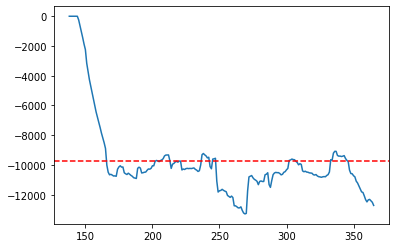

In [41]:
df['30 to 7'].plot()
plt.axhline(y=df['30 to 7'].mean(), color='r', linestyle='--', label='Mean')

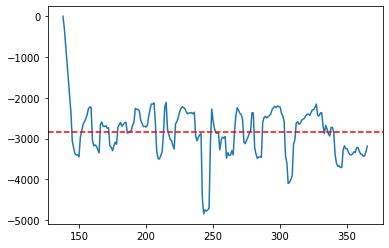

In [42]:
df['7 to 1'].plot()
plt.axhline(y=df['7 to 1'].mean(), color='r', linestyle='--', label='Mean')

<p style = "font-size : 20px; color : #810000 ; font-family : 'Comic Sans MS'; "><strong> We are losing 10000 active old users (30-7 day) and 3000 fresh users(7-1 day) per day. </strong></p>

<p style = "font-size : 20px; color : #34656d ; font-family : 'Comic Sans MS'; "><strong>Looking at engagement-overview DAU MAU and WAU trending</strong></p> 

There are several key metrics used in digital analytics to measure user engagement and retention. Three of the most common metrics are:

- **DAU/MAU:** This ratio represents the daily active users (DAU) divided by the monthly active users (MAU). It shows the percentage of monthly users who also engage with the product on a daily basis. This ratio is often used as an indicator of user engagement and loyalty. A high DAU/MAU ratio suggests that a large portion of a product's monthly user base is highly engaged and using the product on a daily basis.

- **DAU/WAU:** This ratio represents the daily active users (DAU) divided by the weekly active users (WAU). It shows the percentage of weekly users who also engage with the product on a daily basis. This ratio is often used as an indicator of daily retention. A high DAU/WAU ratio suggests that a large portion of a product's weekly user base is returning to the product on a daily basis.

- **WAU/MAU:** This ratio represents the weekly active users (WAU) divided by the monthly active users (MAU). It shows the percentage of monthly users who also engage with the product on a weekly basis. This ratio is often used as an indicator of weekly retention. A high WAU/MAU ratio suggests that a large portion of a product's monthly user base is returning to the product on a weekly basis.

Each of these ratios can provide valuable insights into how users are engaging with a digital product over time. By tracking these ratios, product owners can identify trends and patterns in user behavior and make data-driven decisions about how to improve the user experience.


In [43]:
df = day_df[2]
df = df.drop(df[(df['DAU/MAU'] == 0) & (df['DAU/WAU'] == 0) & (df['WAU/MAU'] == 0)].index)
df

,Nth day,DAU/MAU,DAU/WAU,WAU/MAU
138,138,0.996753,0.996753,1.000000
139,139,0.625850,0.625850,1.000000
140,140,0.401390,0.401390,1.000000
141,141,0.302355,0.302355,1.000000
142,142,0.254102,0.254102,1.000000
...,...,...,...,...
361,361,0.035083,0.144590,0.242640
362,362,0.033030,0.135551,0.243676
363,363,0.032863,0.135824,0.241952
364,364,0.033514,0.141860,0.236249


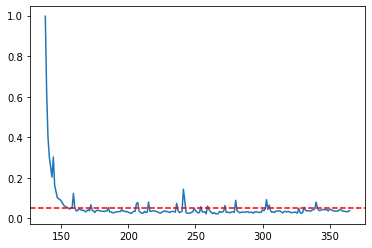

In [44]:
df['DAU/MAU'].plot()
plt.axhline(y=df['DAU/MAU'].mean(), color='r', linestyle='--', label='Mean')

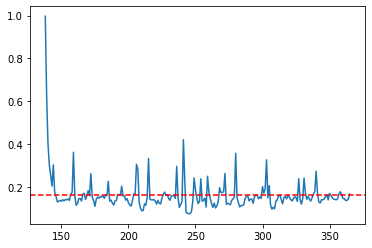

In [45]:
df['DAU/WAU'].plot()
plt.axhline(y=df['DAU/WAU'].mean(), color='r', linestyle='--', label='Mean')

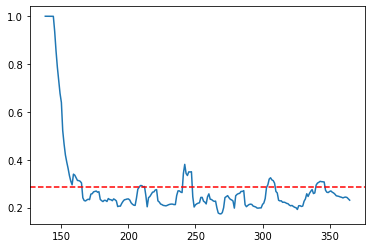

In [46]:
df['WAU/MAU'].plot()
plt.axhline(y=df['WAU/MAU'].mean(), color='r', linestyle='--', label='Mean')

In [47]:
# Analyse seasonal factors 
df[['date', 'day', 'month']] = df['Nth day'].apply(get_date_and_day).apply(pd.Series)
df

,Nth day,DAU/MAU,DAU/WAU,WAU/MAU,date,day,month
138,138,0.996753,0.996753,1.000000,2022-06-15,Wednesday,June
139,139,0.625850,0.625850,1.000000,2022-06-16,Thursday,June
140,140,0.401390,0.401390,1.000000,2022-06-17,Friday,June
141,141,0.302355,0.302355,1.000000,2022-06-18,Saturday,June
142,142,0.254102,0.254102,1.000000,2022-06-19,Sunday,June
...,...,...,...,...,...,...,...
361,361,0.035083,0.144590,0.242640,2023-01-24,Tuesday,January
362,362,0.033030,0.135551,0.243676,2023-01-25,Wednesday,January
363,363,0.032863,0.135824,0.241952,2023-01-26,Thursday,January
364,364,0.033514,0.141860,0.236249,2023-01-27,Friday,January


Text(0, 0.5, 'DAU/MAU')

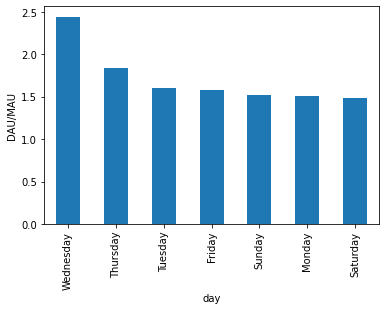

In [48]:
grouped = df.groupby('day')['DAU/MAU'].sum()
sorted_series = grouped.sort_values(ascending=False)
# plot the sum of each group
sorted_series.plot(kind='bar')
# add x and y labels
plt.xlabel('day')
plt.ylabel('DAU/MAU')

Text(0, 0.5, 'DAU/MAU')

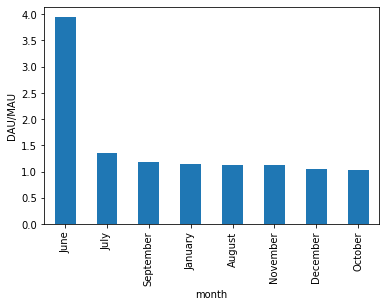

In [49]:
grouped = df.groupby('month')['DAU/MAU'].sum()
sorted_series = grouped.sort_values(ascending=False)
# plot the sum of each group
sorted_series.plot(kind='bar')
# add x and y labels
plt.xlabel('month')
plt.ylabel('DAU/MAU')

<p style = "font-size : 20px; color : #810000 ; font-family : 'Comic Sans MS'; "><strong> It is interesting to note that we have a high daily active users to monthly active users ratio (DAU/MAU) on Wednesdays and June. </strong></p>

Text(0, 0.5, 'DAU/WAU')

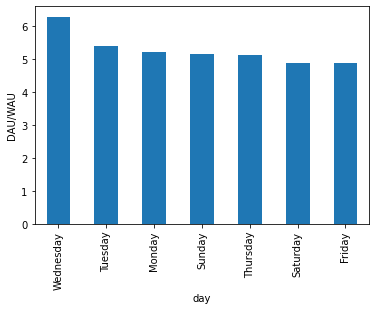

In [50]:
grouped = df.groupby('day')['DAU/WAU'].sum()
sorted_series = grouped.sort_values(ascending=False)
# plot the sum of each group
sorted_series.plot(kind='bar')
# add x and y labels
plt.xlabel('day')
plt.ylabel('DAU/WAU')

Text(0, 0.5, 'DAU/WAU')

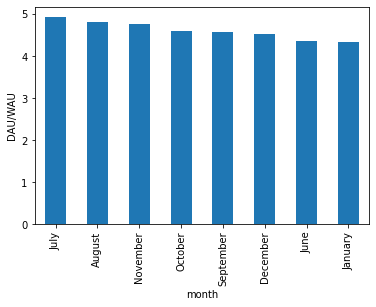

In [51]:
grouped = df.groupby('month')['DAU/WAU'].sum()
sorted_series = grouped.sort_values(ascending=False)
# plot the sum of each group
sorted_series.plot(kind='bar')
# add x and y labels
plt.xlabel('month')
plt.ylabel('DAU/WAU')

<p style = "font-size : 20px; color : #810000 ; font-family : 'Comic Sans MS'; "><strong> It is interesting to note that in our data, Wednesdays consistently have a high ratio of daily active users to weekly active users (DAU/WAU). However, we did not observe any significant differences in DAU/WAU between different months. </strong></p>

Text(0, 0.5, 'WAU/MAU')

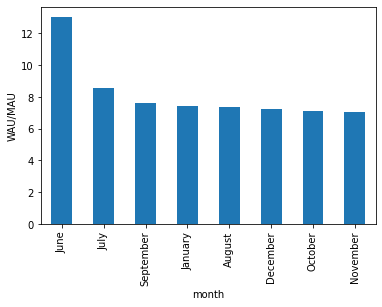

In [52]:
grouped = df.groupby('month')['WAU/MAU'].sum()
sorted_series = grouped.sort_values(ascending=False)
# plot the sum of each group
sorted_series.plot(kind='bar')
# add x and y labels
plt.xlabel('month')
plt.ylabel('WAU/MAU')

Text(0, 0.5, 'WAU/MAU')

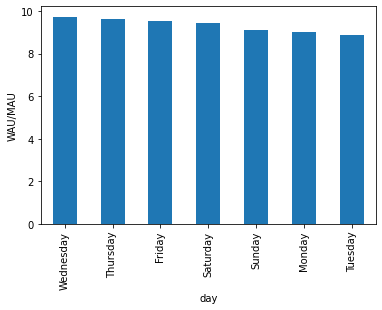

In [53]:
grouped = df.groupby('day')['WAU/MAU'].sum()
sorted_series = grouped.sort_values(ascending=False)
# plot the sum of each group
sorted_series.plot(kind='bar')
# add x and y labels
plt.xlabel('day')
plt.ylabel('WAU/MAU')

<p style = "font-size : 20px; color : #810000 ; font-family : 'Comic Sans MS'; "><strong> It is interesting to note that our data shows a high ratio of weekly active users to monthly active users (WAU/MAU) during the month of June. However, we did not observe any significant differences in WAU/MAU between different days. </strong></p>

<p style = "font-size : 20px; color : #810000 ; font-family : 'Comic Sans MS'; "><strong> Overall, based on the assumption of there is not promotions or other intervention effects, our data suggests that Wednesdays in the month of June are popular times for promoting to active users. </strong></p>